# CycleGAN

Based on:
 - https://github.com/AYLIEN/gan-intro/blob/master/gan.py
 - https://hardikbansal.github.io/CycleGANBlog/

Dataset:
 - http://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/assignments/a4-code.zip

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#tf.enable_eager_execution()
#tf.executing_eagerly()

seed = 42
np.random.seed(seed)
tf.set_random_seed(seed)

Import and preview the Apple and Windows emojis dataset.

In [25]:
def _parse_function(filename):
    """ Get tensor from filename """
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_png(image_string, channels=4) # RGBA images
    # They're probably already all 72x72, but just to make sure -- causes issues?
    #image_resized = tf.image.resize_images(image_decoded, [72, 72])
    # Normalize to be between -1 and 1
    image_cast = tf.cast(image_decoded, tf.float32)
    image_norm = tf.subtract(tf.divide(image_cast, [127.5]), 1)
    return image_norm

def train_input_fn(num_epochs, batch_size):
    """ Get tensors of training data for image sets A and B """
    apple = tf.data.Dataset.list_files("emojis/Apple/*.png").map(_parse_function)
    windows = tf.data.Dataset.list_files("emojis/Windows/*.png").map(_parse_function)
    
    apple_iter = apple.shuffle(num_epochs).repeat().batch(batch_size).make_one_shot_iterator()
    windows_iter = windows.shuffle(num_epochs).repeat().batch(batch_size).make_one_shot_iterator()
    return apple_iter.get_next(), windows_iter.get_next()

def test_input_fn(num_epochs, batch_size):
    """ Get tensors of testing data for image sets A and B """
    apple = tf.data.Dataset.list_files("emojis/Test_Apple/*.png").map(_parse_function)
    windows = tf.data.Dataset.list_files("emojis/Test_Windows/*.png").map(_parse_function)
    
    apple_iter = apple.shuffle(num_epochs).repeat().batch(batch_size).make_one_shot_iterator()
    windows_iter = windows.shuffle(num_epochs).repeat().batch(batch_size).make_one_shot_iterator()
    return apple_iter.get_next(), windows_iter.get_next()

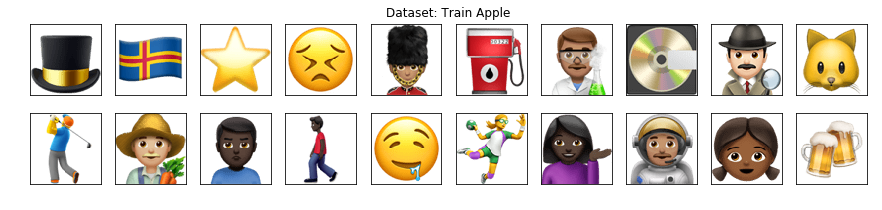

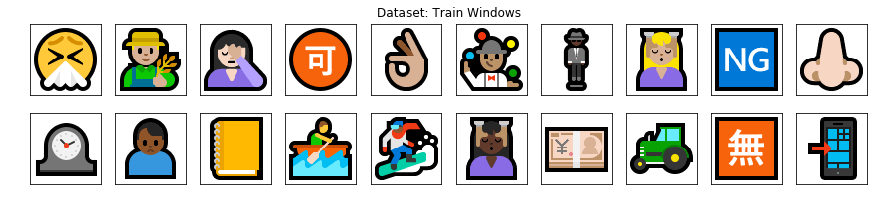

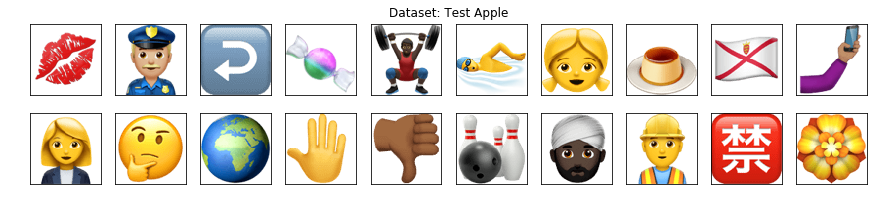

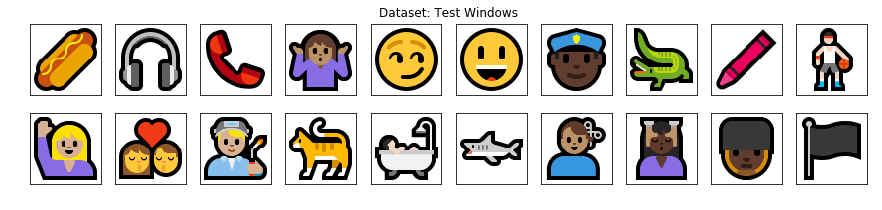

In [43]:
def show(titles, iters, num=20, cols=10):
    with tf.Session() as sess:
        """ Display the first images in a given dataset as a sanity check """
        #iterator = image_dataset.make_one_shot_iterator()

        # Plot each provided dataset (probably 2)
        assert len(titles) == len(iters)
        for i in range(len(titles)):
            fig = plt.figure(figsize=(15, 3))
            plt.axis('off')

            plt.title("Dataset: "+titles[i])

            for j in range(num):
                next_image = sess.run(tf.cast(tf.multiply(tf.add(iters[i],1),127.5), tf.uint8))
                next_image = next_image[0] # Only take first image in batch

                ax = fig.add_subplot(np.ceil(num/cols), cols, j+1)
                ax.grid(False)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(next_image)

        plt.show()

show(["Train Apple", "Train Windows"], train_input_fn(1,1))
show(["Test Apple", "Test Windows"], test_input_fn(1,1))

Implementing the GAN

In [4]:
def cyclegan_model(features, labels, mode, params):
    l = tf.keras.layers
    data_format = 'channels_last'
    
    #net = tf.feature_column.input_layer(features, params['feature_columns'])
    
def run_gan(num_epochs=100, batch_size=16):
    # Define the model
    my_feature_columns = []
    for key in train_x.keys():
        my_feature_columns.append(tf.feature_column.numeric_column(key=key))
        
    gan = tf.estimator.Estimator(
        model_fn=cyclegan_model,
        params={
            'feature_columns': my_feature_columns
        })

    # Train
    gan.train(input_fn=lambda: train_input_fn(num_epochs, batch_size))
    
    # Visually evaluate samples
    predictions = gan.predict(input_fn=lambda: test_input_fn(num_epochs, batch_size))
    
    # TODO: Plot 'em